<a href="https://colab.research.google.com/github/RahulPatnaik/ML-practice/blob/main/LeNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

input_shape = (28, 28, 1)

In [6]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train = x_train / 255.0
x_test = x_test / 255.0

In [7]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [8]:
def build_lenet(input_shape):
    model = tf.keras.Sequential()

    model.add(tf.keras.layers.Conv2D(6, kernel_size= (5,5), strides= (1,1), activation= 'tanh', input_shape= input_shape))

    model.add(tf.keras.layers.AveragePooling2D(pool_size= (2, 2), strides= (2, 2)))

    model.add(tf.keras.layers.Conv2D(16, kernel_size= (2, 2), strides= (1,1), activation= 'tanh'))

    model.add(tf.keras.layers.AveragePooling2D(pool_size= (2, 2), strides= (1, 1)))

    model.add(tf.keras.layers.Flatten())

    model.add(tf.keras.layers.Dense(120, activation= 'tanh'))

    model.add(tf.keras.layers.Dense(84, activation= 'tanh'))

    model.add(tf.keras.layers.Dense(10, activation= 'softmax'))

    model.compile(loss= 'categorical_crossentropy', optimizer= tf.keras.optimizers.SGD(learning_rate= 0.01, momentum= 0.9), metrics= ['accuracy'])

    return model


In [9]:
def scheduler(epoch, lr):
    if epoch < 2:
        return 0.01
    elif epoch < 5:
        return 0.005
    elif epoch < 8:
        return 0.0025
    else:
        return 0.00125

In [10]:
lr_callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [11]:
lenet = build_lenet(input_shape)

epochs = 20

history = lenet.fit(x_train, y_train, epochs= epochs, callbacks= [lr_callback], validation_data= (x_test, y_test), batch_size= 128, verbose= 1)

Epoch 1/20
469/469 [==============================] - 22s 45ms/step - loss: 0.3857 - accuracy: 0.8899 - val_loss: 0.1867 - val_accuracy: 0.9453 - lr: 0.0100
Epoch 2/20
469/469 [==============================] - 22s 47ms/step - loss: 0.1546 - accuracy: 0.9541 - val_loss: 0.1177 - val_accuracy: 0.9660 - lr: 0.0100
Epoch 3/20
469/469 [==============================] - 20s 43ms/step - loss: 0.1060 - accuracy: 0.9694 - val_loss: 0.0930 - val_accuracy: 0.9731 - lr: 0.0050
Epoch 4/20
469/469 [==============================] - 22s 47ms/step - loss: 0.0902 - accuracy: 0.9739 - val_loss: 0.0813 - val_accuracy: 0.9744 - lr: 0.0050
Epoch 5/20
469/469 [==============================] - 22s 47ms/step - loss: 0.0779 - accuracy: 0.9778 - val_loss: 0.0741 - val_accuracy: 0.9772 - lr: 0.0050
Epoch 6/20
469/469 [==============================] - 21s 45ms/step - loss: 0.0682 - accuracy: 0.9808 - val_loss: 0.0685 - val_accuracy: 0.9791 - lr: 0.0025
Epoch 7/20
469/469 [==============================] - 22s 

1/1 [==============================] - 0s 166ms/step
9


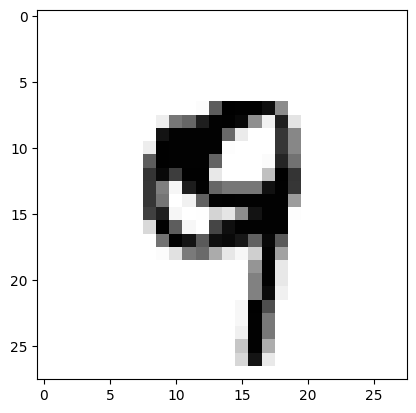

In [12]:
image_index = 4444
plt.imshow(x_test[image_index].reshape(28, 28), cmap= 'Greys')

pred = lenet.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())
